# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [10]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [15]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [12]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

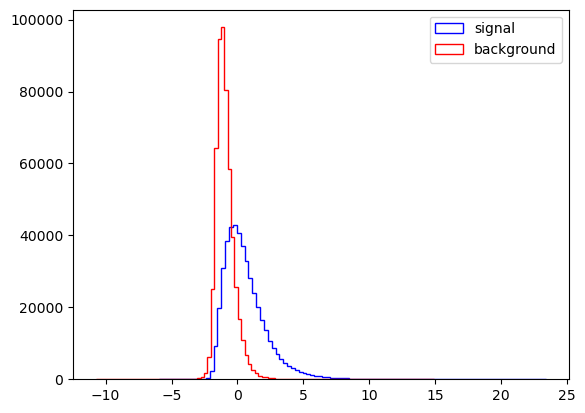

In [13]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

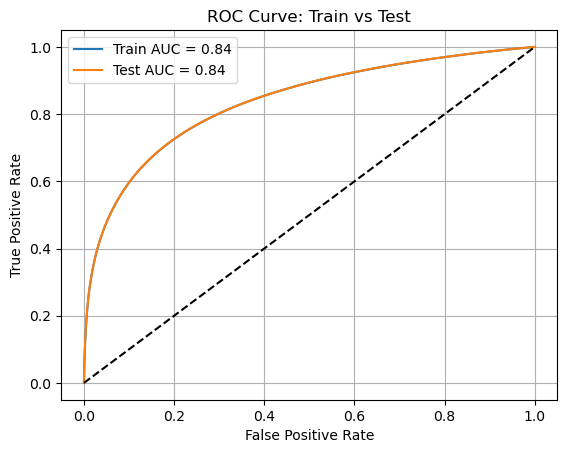

In [7]:
# Train ROC
fpr_train, tpr_train, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))
auc_train = auc(fpr_train, tpr_train)

# Test ROC
fpr_test, tpr_test, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Train vs Test')
plt.legend()
plt.grid()
plt.show()


*There is no significant bias or overfitting seen from this ROC comparison.

The classifier is performing similarly on both known training and test data sov this indicates the model is stable.

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

Running: Raw
Raw AUC: 0.83
Running: Features
Features AUC: 0.82
Running: Raw+Features
Raw+Features AUC: 0.84


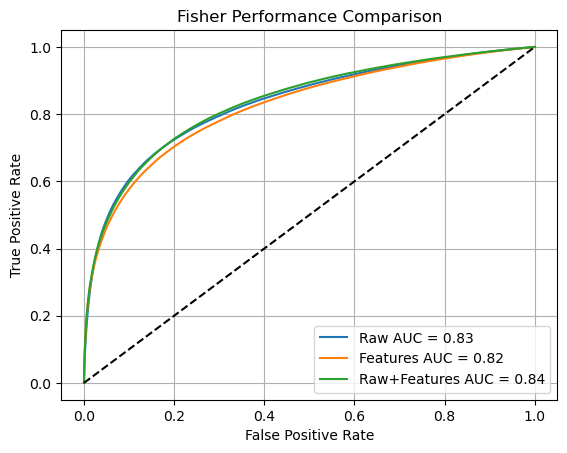

In [8]:
# Splitting the input data
X_raw = X_Train.iloc[:, :8]
X_feat = X_Train.iloc[:, 8:]
X_all = X_Train

X_test_raw = X_Test.iloc[:, :8]
X_test_feat = X_Test.iloc[:, 8:]
X_test_all = X_Test

models = {"Raw": (X_raw, X_test_raw),"Features": (X_feat, X_test_feat),"Raw+Features": (X_all, X_test_all)}

plt.figure()

for label, (X_tr, X_te) in models.items():
    print(f"Running: {label}")
    model = DA.LinearDiscriminantAnalysis()
    model.fit(X_tr, y_Train)
    y_scores = model.decision_function(X_te)

    fpr, tpr, _ = roc_curve(y_Test, y_scores)
    auc_score = auc(fpr, tpr)

    print(f"{label} AUC: {auc_score:.2f}")
    plt.plot(fpr, tpr, label=f'{label} AUC = {auc_score:.2f}')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fisher Performance Comparison')
plt.legend()
plt.grid()
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier
clf3 = KNeighborsClassifier()


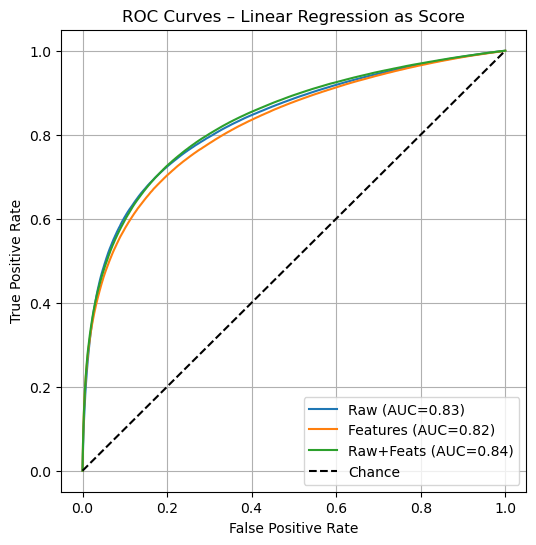

In [21]:

models = {
    "Raw":       (X_Train.iloc[:, :8],  X_Test.iloc[:, :8]),
    "Features":  (X_Train.iloc[:, 8:],  X_Test.iloc[:, 8:]),
    "Raw+Feats": (X_Train,             X_Test)
}

plt.figure(figsize=(6,6))
for name, (X_tr, X_te) in models.items():
    # 1) fit linear regressor
    lr = LinearRegression()
    lr.fit(X_tr, y_Train)
    # 2) get continuous “scores”
    y_scores = lr.predict(X_te)
    # 3) compute ROC & AUC
    fpr, tpr, _ = roc_curve(y_Test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Linear Regression as Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:


models = {
    "Raw":       (X_Train.iloc[:, :8],  X_Test.iloc[:, :8]),
    "Features":  (X_Train.iloc[:, 8:],  X_Test.iloc[:, 8:]),
    "Raw+Feats": (X_Train,             X_Test)
}

plt.figure(figsize=(6,6))
for name, (X_tr, X_te) in models.items():
    rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    rf.fit(X_tr, y_Train)
    y_scores = rf.predict_proba(X_te)[:, 1]
    fpr, tpr, _ = roc_curve(y_Test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import confusion_matrix

# Define significance function
def compute_significance(clf, X_train, y_train, X_test, y_test, threshold=0.5):
    clf.fit(X_train, y_train)

    # Get prediction scores
    if hasattr(clf, "predict_proba"):
        y_scores = clf.predict_proba(X_test)[:, 1]
    else:
        y_scores = clf.decision_function(X_test)

    y_pred = (y_scores > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    NS = tp
    NB = fp

    if NS + NB == 0:
        sigma_S = 0
    else:
        sigma_S = NS / np.sqrt(NS + NB)

    return sigma_S

# Now compute σ_S for Logistic Regression only
sigma_S_logistic = compute_significance(clf1, X_Train, y_Train, X_Test, y_Test)

print(f"Maximal Significance σ_S (Logistic Regression) = {sigma_S_logistic:.2f}")


Maximal Significance σ_S (Logistic Regression) = 507.52


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

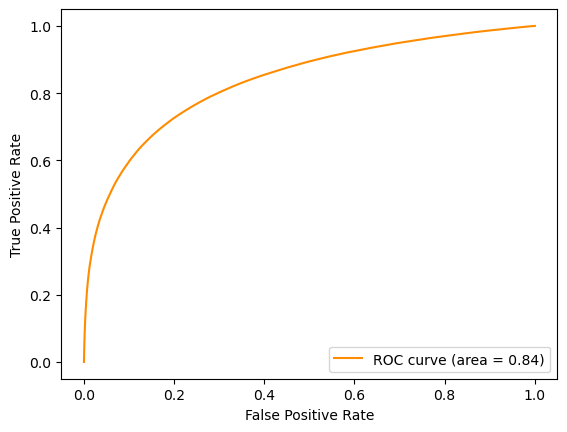

In [8]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curvje(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score


In [18]:
models = {
    "Raw":       (X_Train.iloc[:, :8],  X_Test.iloc[:, :8]),
    "Features":  (X_Train.iloc[:, 8:],  X_Test.iloc[:, 8:]),
    "Raw+Feats": (X_Train,             X_Test)
}


In [19]:
rows = []
for name, (X_tr, X_te) in models.items():
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_tr, y_Train)
    
    y_pred = clf.predict(X_te)
    y_prob = clf.predict_proba(X_te)[:, 1]
    
    # ROC curve & AUC
    fpr, tpr, thresh = roc_curve(y_Test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Youden’s J = tpr - fpr → maximal significance
    j_scores   = tpr - fpr
    best_idx   = np.argmax(j_scores)
    best_th    = thresh[best_idx]
    max_sig    = j_scores[best_idx]
    
    rows.append({
        "Scenario": name,
        "TPR (Recall)": recall_score(y_Test, y_pred),
        "FPR": fpr[best_idx],
        "AUC": roc_auc,
        "Accuracy": accuracy_score(y_Test, y_pred),
        "Precision": precision_score(y_Test, y_pred),
        "F1 Score": f1_score(y_Test, y_pred),
        "Best Threshold": best_th,
        "Max Significance (J)": max_sig
    })


df_metrics = pd.DataFrame(rows)
display(df_metrics)

,Scenario,TPR (Recall),FPR,AUC,Accuracy,Precision,F1 Score,Best Threshold,Max Significance (J)
0,Raw,0.650732,0.166073,0.831423,0.768061,0.805737,0.719986,0.458469,0.522448
1,Features,0.652792,0.169403,0.833821,0.770572,0.809650,0.722809,0.450367,0.527854
2,Raw+Feats,0.677568,0.161420,0.858159,0.788469,0.829581,0.745908,0.436752,0.566326
